                        Accuracy  F1 Score  Training Time
Logistic Regression        0.830  0.830411       0.030125
Random Forest              0.875  0.875330       1.313865
Gradient Boosting          0.900  0.900301       1.031756
Support Vector Machine     0.830  0.830477       0.038435
Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Ensemble Accuracy: 0.88


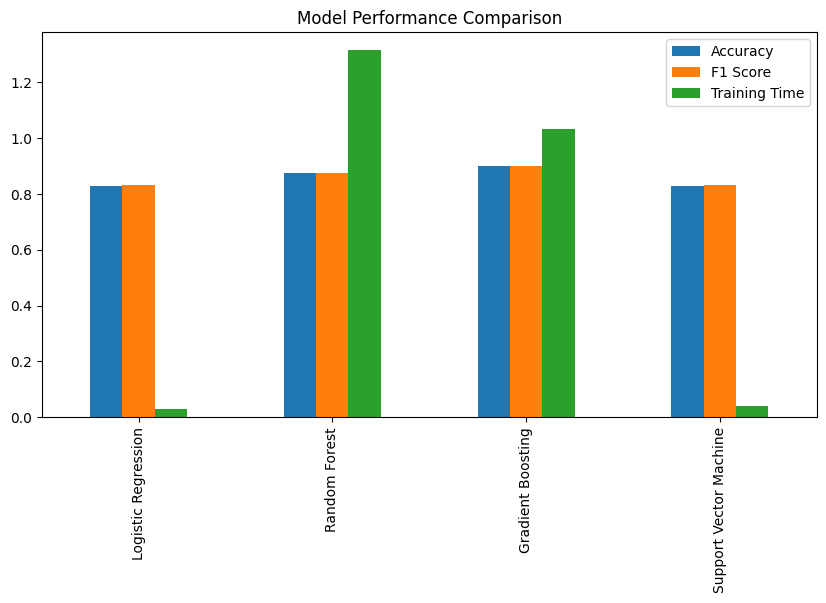

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import joblib
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/various_models/synthetic_dataset.csv")

# Preprocessing
X = data.drop("target", axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to test
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC()
}

# Model evaluation
results = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Training Time": end_time - start_time
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Hyperparameter tuning for best model
best_model = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_)

# Ensemble Learning
ensemble_model = VotingClassifier(
    estimators=[('rf', RandomForestClassifier(n_estimators=100)),
                ('gb', GradientBoostingClassifier(n_estimators=100)),
                ('svm', SVC(probability=True))],
    voting='soft')
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))

# Save the best model
joblib.dump(grid_search.best_estimator_, "best_model.pkl")

# Plot model comparison
results_df.plot(kind='bar', figsize=(10,5))
plt.title("Model Performance Comparison")
plt.show()
